In [5]:
!pip install -Uqq fastai duckduckgo_search

# DDG API documentation
# https://pypi.org/project/duckduckgo-search/#3-images---image-search-by-duckduckgocom
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.vision.all import *
from duckduckgo_search import DDGS

In [11]:
# helpful functions to DRY

# need to make sure this is closed later on
def search_ddg(search_terms):
    ddgs = DDGS()
    return ddgs.images(
        keywords = search_terms,
        region="wt-wt",
        safesearch="moderate",
        type_image="photo",
    )

In [12]:
categories = 'dolphin', 'manatee', 'turtle', 'whale'
generators = {}
for category in categories:
    generators[category] = search_ddg(category)
    
print(next(generators['dolphin']))
print(next(generators['manatee']))
print(next(generators['whale']))
print(next(generators['turtle']))

{'title': 'Dolphin 4k Ultra HD Wallpaper', 'image': 'https://images.alphacoders.com/293/293531.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.iEJ06_DV_5PHBbDWIZ6ZqQHaF1&pid=Api', 'url': 'https://wall.alphacoders.com/big.php?i=293531', 'height': 3781, 'width': 4800, 'source': 'Bing'}
{'title': 'What is a manatee? | The US Sun', 'image': 'https://www.the-sun.com/wp-content/uploads/sites/6/2021/01/NINTCHDBPICT000556318227.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.8M9zoNiXN3jHC3Z7mFtN4QHaFj&pid=Api', 'url': 'https://www.the-sun.com/news/2123808/what-is-a-manatee/', 'height': 3024, 'width': 4032, 'source': 'Bing'}
{'title': 'Fascinating Humpback Whale Facts', 'image': 'https://fthmb.tqn.com/l1vhEscfQQUiCi9W8ZpJ79vc144=/5200x3313/filters:fill(auto,1)/humpback-whale-underwater-portrait--107312834-5a01c2cab39d03001952917f.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.ex5KYElGdSup7eoO0fMIwQHaEt&pid=Api', 'url': 'https://www.thoughtco.com/humpback-whale-facts-415435

Just for fun, download a few images

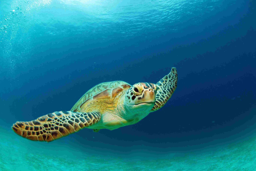

In [13]:
for animal in categories:
    gen = generators[animal]
    name = animal + '.jpg'
    download_url(next(gen)['image'], name, show_progress=False)
    Image.open(name).to_thumb(256,256)

Image.open('turtle.jpg').to_thumb(256,256)

In [14]:
def get_n_urls (generator, n):
    items=[]
    for i in range(n):
        try:
            items.append(next(generator)['image'])
        except StopIteration:
            break
    return items

In [19]:
n_images = 50 # how many images each search downloads
path = Path('lesson1/training_images')

for category in categories:
    dest = (path/category)
    dest.mkdir(exist_ok=True, parents=true)
    gen = generators[category]
    download_images(dest, urls=get_n_urls(gen, n_images))
    resize_images(path/category, max_size=400, dest=path/category)

In [ ]:
# #TODO bug this is putting images in the wrong folders
# image_gens=[dolphins, whales, manatees, turtles]
# searches = 'dolphin', 'whale', 'manatee','turtle'
# path = Path('training_images')
# 
# 
# for category in searches:
#     print(f"1 cat='{category}'")
#     dest = (path/category)
#     dest.mkdir(exist_ok=True, parents=True)
#     for gen in image_gens:
#         print(f"2 cat='{category}'")
#         download_images(dest, urls=get_n_urls(gen, 50))
#     resize_images(path/category, max_size=400, dest=path/category)
#         

In [ ]:
# #TODO bug this is putting images in the wrong folders
# image_gens=[dolphins, whales, manatees, turtles]
# searches = 'dolphin', 'whale', 'manatee','turtle'
# path = Path('training_images')
# 
# for category, gen in zip(searches, image_gens):
#     print(f"1 cat='{category}'")
#     dest = (path/category)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=get_n_urls(gen, 50))
#     resize_images(path/category, max_size=400, dest=path/category)
        

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Now we download data that should not match the model. After that we will run predictions

In [ ]:
# Should not match at all
dogs = search_ddg('dog')
dog = next(dogs)
download_url(dog['image'], 'dog.jpg', show_progress=False)
Image.open('dog.jpg').to_thumb(256, 256)

# Might match or partially match the model vs dolphins or whales
sharks = search_ddg('shark')
shark = next(sharks)
download_url(shark['image'], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

Now we compare our images vs the model and see what it predicts.

In [ ]:
#TODO - through this in the cloud and see if it' sbetter
#TODO - use these critters in his code
#TODO use animals that aren't in the sea. BIgger differences
is_dolphin,_,probs = learn.predict(PILImage.create('dolphin.jpg'))
print(f"This is a: {dolphin}.")
print(f"Probability it's a dolphin: {probs[0]:.4f}")

is_whale,_,probs = learn.predict(PILImage.create('whale.jpg'))
print(f"This is a: {whale}.")
print(f"Probability it's a whale: {probs[0]:.4f}")

is_turtle,_,probs = learn.predict(PILImage.create('turtle.jpg'))
print(f"This is a: {turtle}.")
print(f"Probability it's a turtle: {probs[0]:.4f}")

is_manatee,_,probs = learn.predict(PILImage.create('manatee.jpg'))
print(f"This is a: {manatee}.")
print(f"Probability it's a manatee: {probs[0]:.4f}")

Lastly, we need to close all the generators used. It would have been better to put all the generators in an array so they could be iterated through, but this is fine. I'm focusing on ML over Python.